# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [13]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [19]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [21]:
# Extract all rows of data
all_rows= soup.find_all('table', class_='table')
all_rows

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [25]:
# Create an empty list
rows_list = []

# Loop through the scraped data
for i in all_rows:
    j = i.find_all('tr')
    row = [item.text for item in j]
    rows_list.append(row)  
    
# Now rows_list contains all the rows of scraped data
print(rows_list)



[['\nid\nterrestrial_date\nsol\nls\nmonth\nmin_temp\npressure\n', '\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n', '\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n', '\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n', '\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n', '\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n', '\n57\n2012-08-21\n15\n158\n6\n-78.0\n740.0\n', '\n68\n2012-08-22\n16\n158\n6\n-77.0\n740.0\n', '\n79\n2012-08-23\n17\n159\n6\n-76.0\n742.0\n', '\n112\n2012-08-27\n21\n161\n6\n-74.0\n741.0\n', '\n114\n2012-08-28\n22\n162\n6\n-74.0\n742.0\n', '\n123\n2012-08-29\n23\n162\n6\n-75.0\n741.0\n', '\n134\n2012-08-30\n24\n163\n6\n-75.0\n742.0\n', '\n145\n2012-08-31\n25\n163\n6\n-75.0\n743.0\n', '\n156\n2012-09-01\n26\n164\n6\n-76.0\n745.0\n', '\n163\n2012-09-02\n27\n164\n6\n-75.0\n743.0\n', '\n170\n2012-09-03\n28\n165\n6\n-75.0\n745.0\n', '\n171\n2012-09-04\n29\n166\n6\n-75.0\n747.0\n', '\n172\n2012-09-05\n30\n166\n6\n-74.0\n747.0\n', '\n173\n2012-09-06\n31\n167\n6\n-74.0\n745.0\n', '\n175\n2012

In [33]:
# Define the column names
tables = pd.read_html(url)
mars_weather_df = tables[0]

In [35]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [41]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['id'] = mars_weather_df['id'].astype(object)

In [43]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [45]:
# Count the number of unique months
num_months = mars_weather_df['month'].nunique()
print(f"Number of months on Mars: {num_months}")


Number of months on Mars: 12


In [47]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = mars_weather_df.shape[0]
print(f"Number of Martian days worth of data: {num_martian_days}")

Number of Martian days worth of data: 1867


In [49]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()

print(f"Coldest month: {coldest_month}, Warmest month: {warmest_month}")

Coldest month: 3, Warmest month: 8


<Axes: title={'center': 'Average Minimum Temperature by Martian Month'}, xlabel='month'>

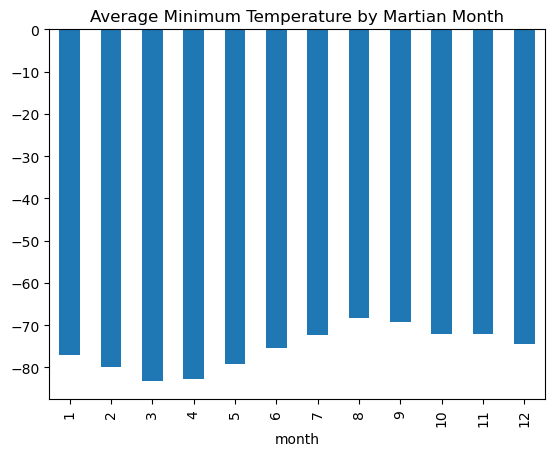

In [51]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Martian Month')

<Axes: title={'center': 'Average Minimum Temperature by Martian Month'}, xlabel='month'>

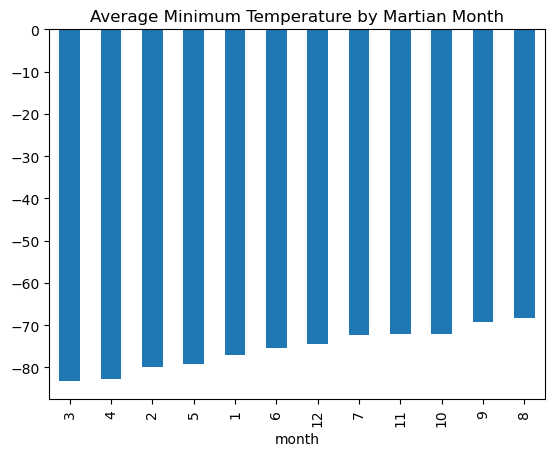

In [55]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp.sort_values()
sorted_avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Martian Month')

In [57]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Average Pressure by Martian Month'}, xlabel='month'>

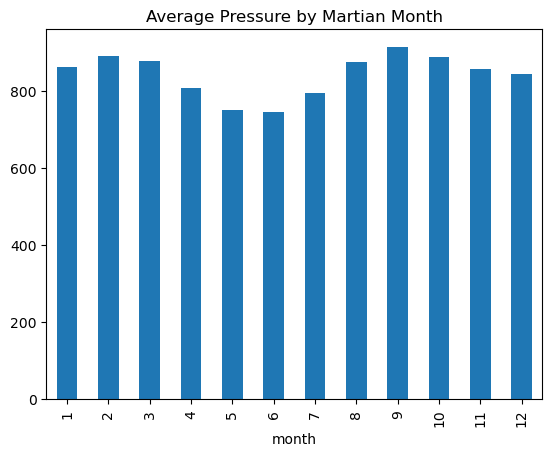

In [59]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Pressure by Martian Month')

<Axes: title={'center': 'Average Pressure by Martian Month'}, xlabel='month'>

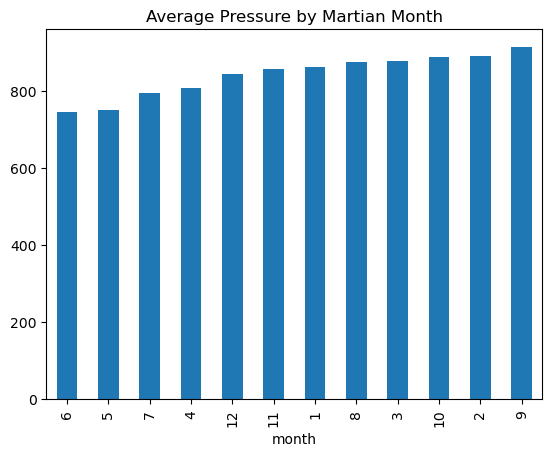

In [61]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure.sort_values()
sorted_avg_pressure.plot(kind='bar', title='Average Pressure by Martian Month')

There are 687 terrestrial days in a Martian year.


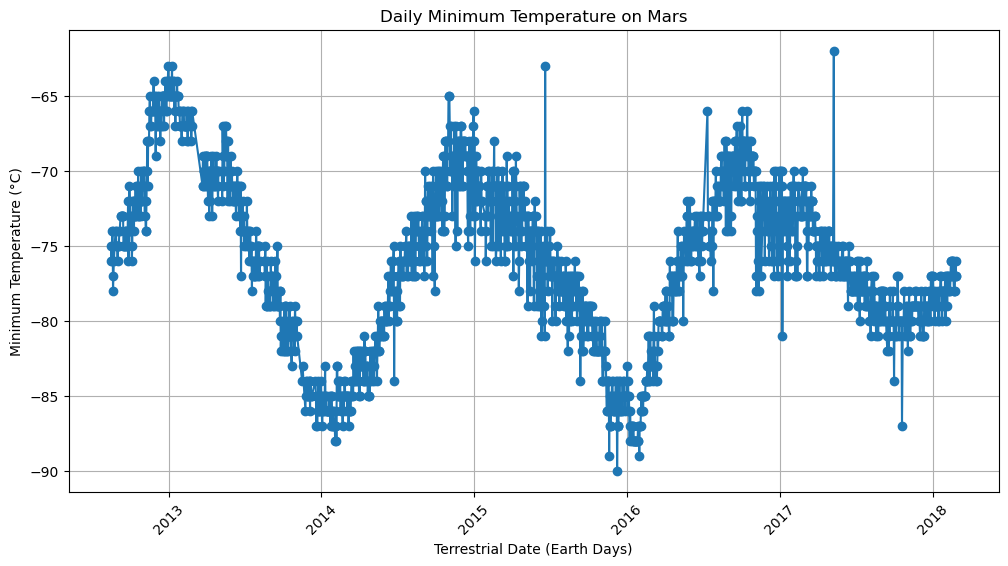

In [69]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
DaysOnMars = 687
print("There are", DaysOnMars, "terrestrial days in a Martian year.")

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date (Earth Days)')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Minimum Temperature

Comparative to Earth, Mars is quite cold. Using averages, we calculated the third month has the coldest temperature on Mars, while the eighth month had the warmets.

#### Atmospheric Pressure

On average, atomospheric pressire is lowest in the sixth month and highest in the ninth month. 

#### Year Length

Using online resources, we find that one year on Mars equates to about 687 days, nearly 88% more days than Earth!

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [75]:
# Write the DataFrame to a CSV file
mars_weather_df.to_csv(output_file, index=False)

# Specify the output file path
mars_weather_csv = r'C:\Users\srand\OneDrive\Desktop\module_11_challenge\Starter_Code\mars_weather_data.csv'

In [22]:
browser.quit()